In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import plotly.graph_objects as go

%matplotlib inline

sns.set_style('darkgrid')

In [21]:
ambev = yf.download('ABEV3.SA', start='2019-01-01')
ambev

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-02:00,15.400000,16.299999,15.400000,16.150000,13.950427,18692900
2019-01-03 00:00:00-02:00,16.010000,16.330000,15.890000,16.330000,14.105910,22739200
2019-01-04 00:00:00-02:00,16.299999,16.690001,16.030001,16.549999,14.295947,27484600
2019-01-07 00:00:00-02:00,16.570000,16.629999,16.340000,16.480000,14.235481,17084500
2019-01-08 00:00:00-02:00,16.540001,16.700001,16.090000,16.150000,13.950427,22108700
...,...,...,...,...,...,...
2023-02-01 00:00:00-03:00,13.640000,13.730000,12.850000,13.180000,13.180000,136662100
2023-02-02 00:00:00-03:00,13.060000,13.530000,13.000000,13.110000,13.110000,49730600
2023-02-03 00:00:00-03:00,13.070000,13.220000,12.910000,12.980000,12.980000,40568400


<AxesSubplot:xlabel='Date'>

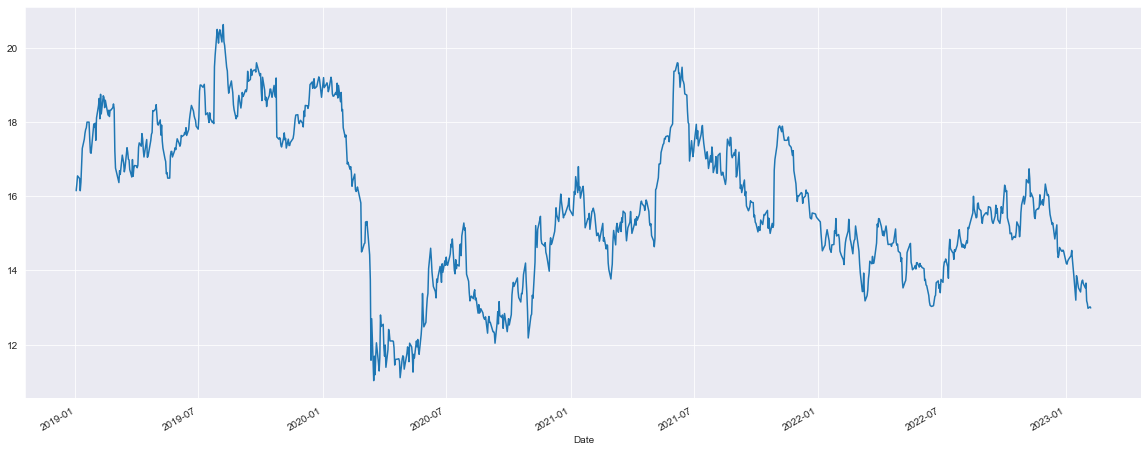

In [22]:
ambev['Close'].plot(figsize=(20,8))

In [23]:
def fun_BOLLINGER(df):
    
    df['MMS_20'] = df['Close'].rolling(window = 20).mean()

    df['Desvio_padrao'] = df['Close'].rolling(window = 20).std()

    df['Banda_Superior'] = df['MMS_20'] + (df['Desvio_padrao'] * 2)
    df['Banda_Inferior'] = df['MMS_20'] - (df['Desvio_padrao'] * 2)

    return df

In [24]:
def sinal_Compra_venda(df):
    
    df['Sinal_compra'] = np.where(df['Banda_Inferior'] > df['Close'], df['Close'], np.nan)
    df['Sinal_venda'] = np.where(df['Banda_Superior'] < df['Close'], df['Close'], np.nan)
    
    return df

In [25]:
ambev = fun_BOLLINGER(ambev)

In [26]:
ambev = sinal_Compra_venda(ambev)

In [43]:
def mostrar_grafico(df, nome):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(1,1,1)

    ax.plot(df.index, df['Close'], linewidth = 2, label = nome.upper())
    ax.plot(df.index, df['MMS_20'], linewidth = 1, label = 'Média móvel simples - 20 dias')
    ax.plot(df.index, df['Banda_Superior'], linewidth = 1, label = 'Banda Superior')
    ax.plot(df.index, df['Banda_Inferior'], linewidth = 1, label = 'Banda Superior')

    ax.scatter(df.index, df['Sinal_compra'], marker = '^', linewidth = 3, color = 'green', label = 'Sinal de Compra')
    ax.scatter(df.index, df['Sinal_venda'], marker = 'v', linewidth = 3, color = 'red', label = 'Sinanl de Venda')

    plt.title(f'Ações {nome.upper()} com Bandas de BOLLINGER', fontsize = 25)
    plt.legend()
    plt.show()
    return

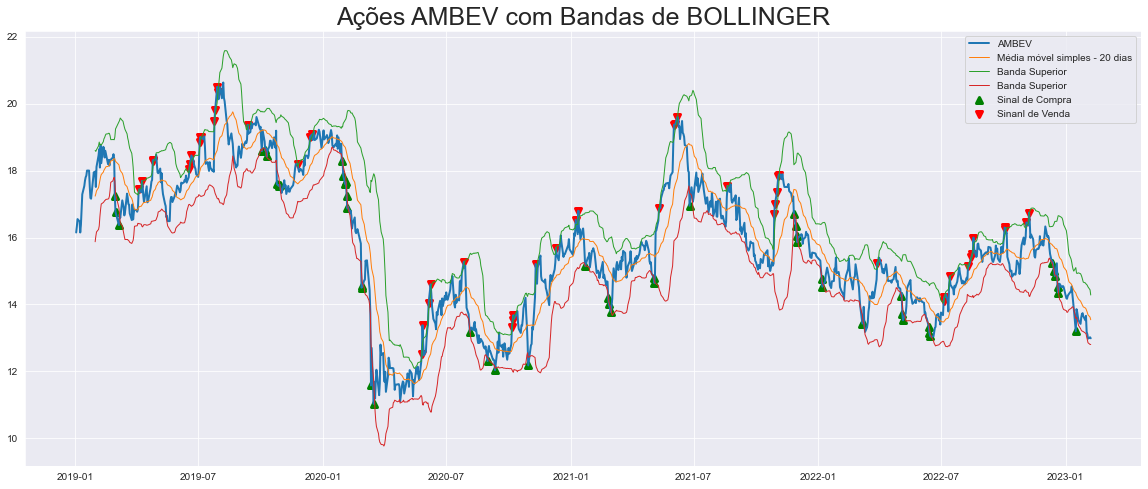

In [44]:
mostrar_grafico(ambev, 'ambev')

In [45]:
americanas = yf.download('AMER3.SA', start='2019-01-01')
americanas

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-02:00,41.444191,43.549511,41.216854,42.501793,41.664917,2085664
2019-01-03 00:00:00-02:00,42.254688,43.460556,41.612221,42.936695,42.091255,1464771
2019-01-04 00:00:00-02:00,42.946579,42.966347,41.216854,41.513378,40.695965,1680976
2019-01-07 00:00:00-02:00,41.513378,42.185501,39.497017,39.674931,38.893715,2520806
2019-01-08 00:00:00-02:00,39.842960,41.958164,39.842960,41.513378,40.695965,2448367
...,...,...,...,...,...,...
2023-02-01 00:00:00-03:00,1.970000,2.140000,1.750000,2.090000,2.090000,292633500
2023-02-02 00:00:00-03:00,2.050000,2.090000,1.490000,1.680000,1.680000,247792800
2023-02-03 00:00:00-03:00,1.580000,1.820000,1.560000,1.630000,1.630000,132269500


In [46]:
americanas = fun_BOLLINGER(americanas)
americanas = sinal_Compra_venda(americanas)

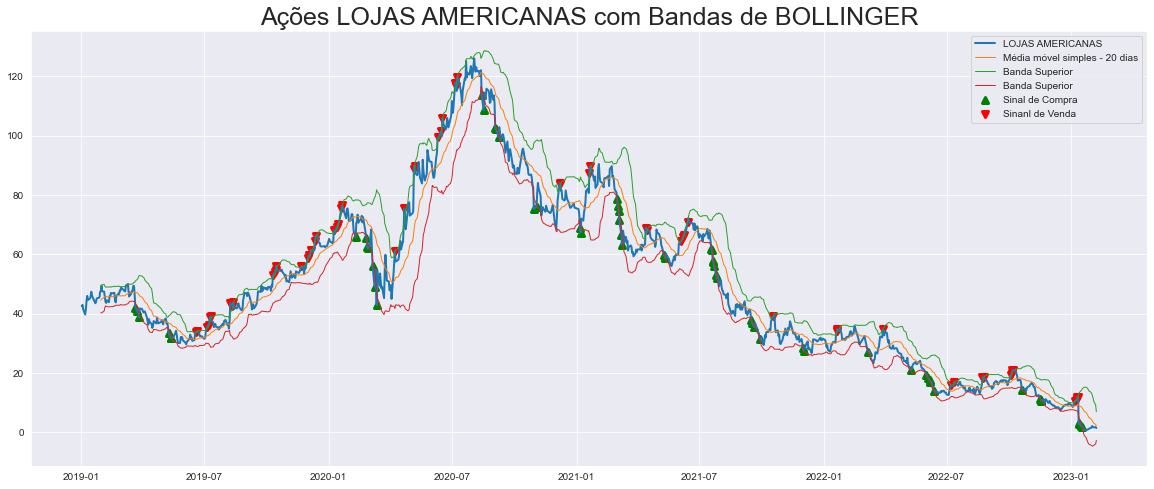

In [47]:
mostrar_grafico(americanas, 'lojas americanas')

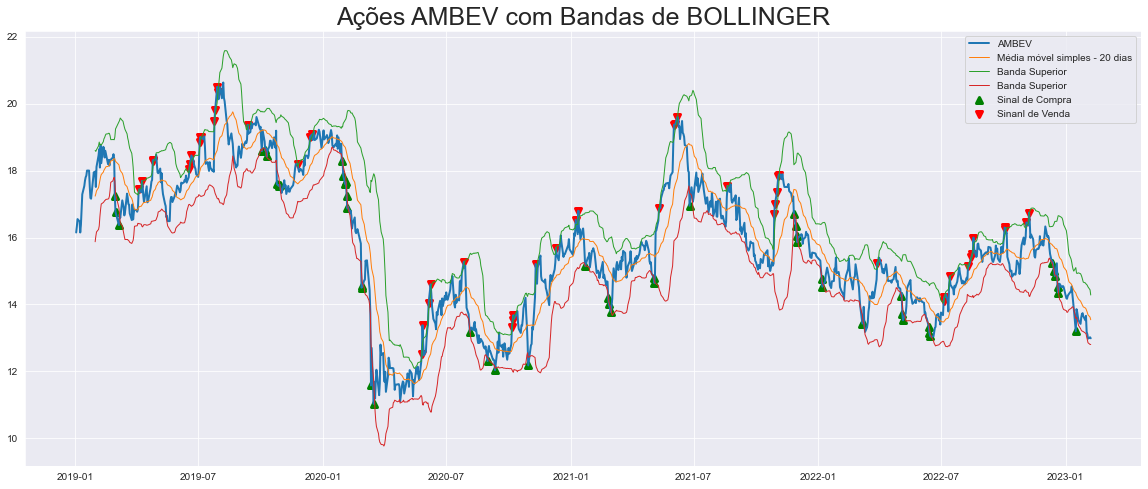

In [48]:
mostrar_grafico(ambev, 'ambev')